# Plant Growth Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d gorororororo23/plant-growth-data-classification

Dataset URL: https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification
License(s): other
  0%|                                               | 0.00/4.45k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 4.45k/4.45k [00:00<00:00, 6.22MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Plant Growth Classification/plant-growth-data-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Plant Growth Classification')
zip_ref.close()

## Exploratory Data Analysis

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('plant_growth_data.csv')

In [37]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [6]:
df.shape

(193, 7)

In [7]:
df.size

1351

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunlight_Hours,193.0,6.826484,1.599509,4.033133,5.477000,6.833290,8.241144,9.913903
Temperature,193.0,25.076087,5.354170,15.200000,20.637095,25.912336,29.757938,34.810103
Humidity,193.0,58.098927,12.631799,30.567682,49.300000,59.182806,69.100000,79.648240
Growth_Milestone,193.0,0.497409,0.501294,0.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Soil_Type             3
Sunlight_Hours      190
Water_Frequency       3
Fertilizer_Type       3
Temperature         189
Humidity            191
Growth_Milestone      2
dtype: int64

In [13]:
df['Growth_Milestone'].value_counts()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64

## Data Visualization

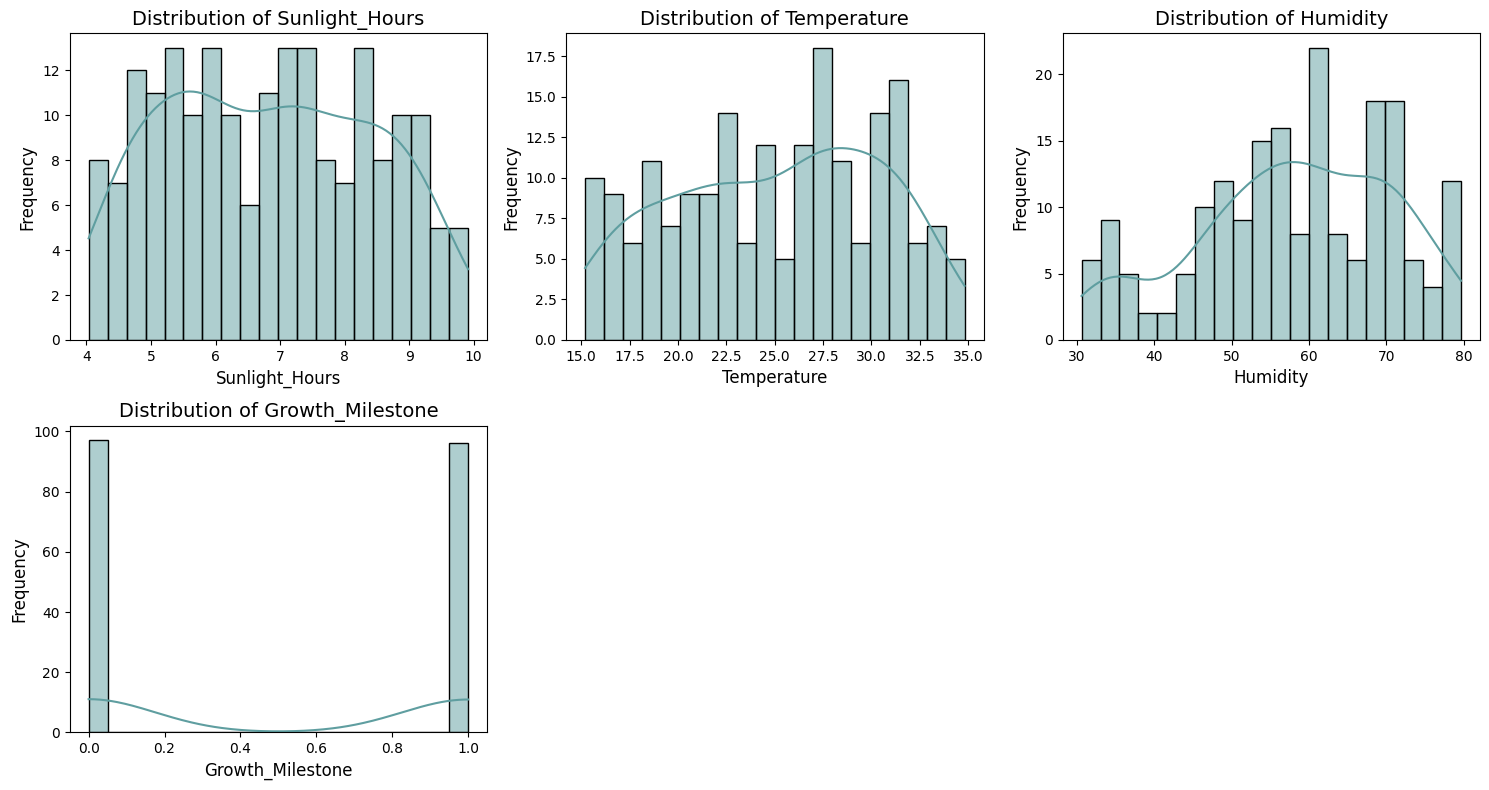

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True, axis=1)

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

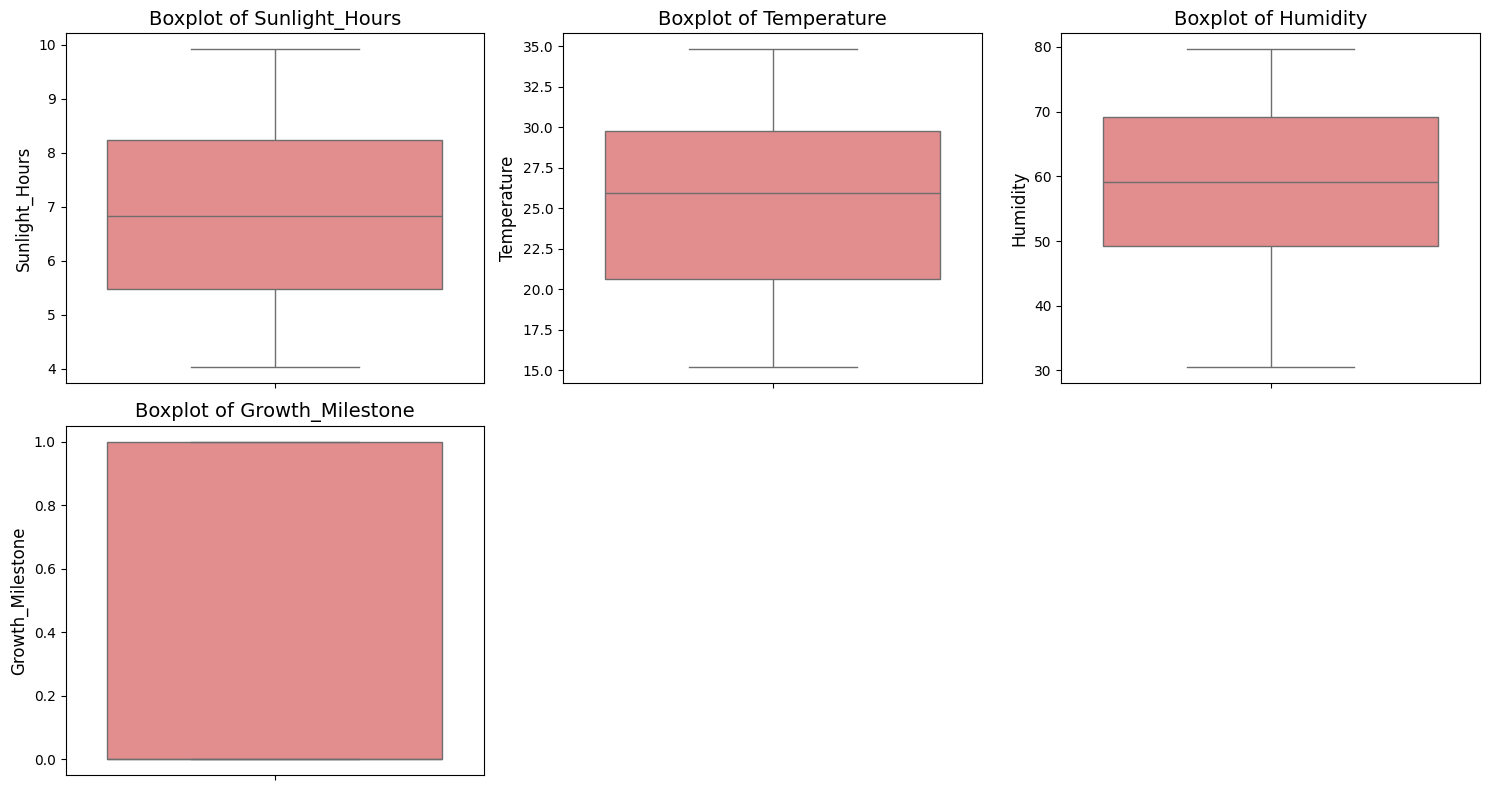

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

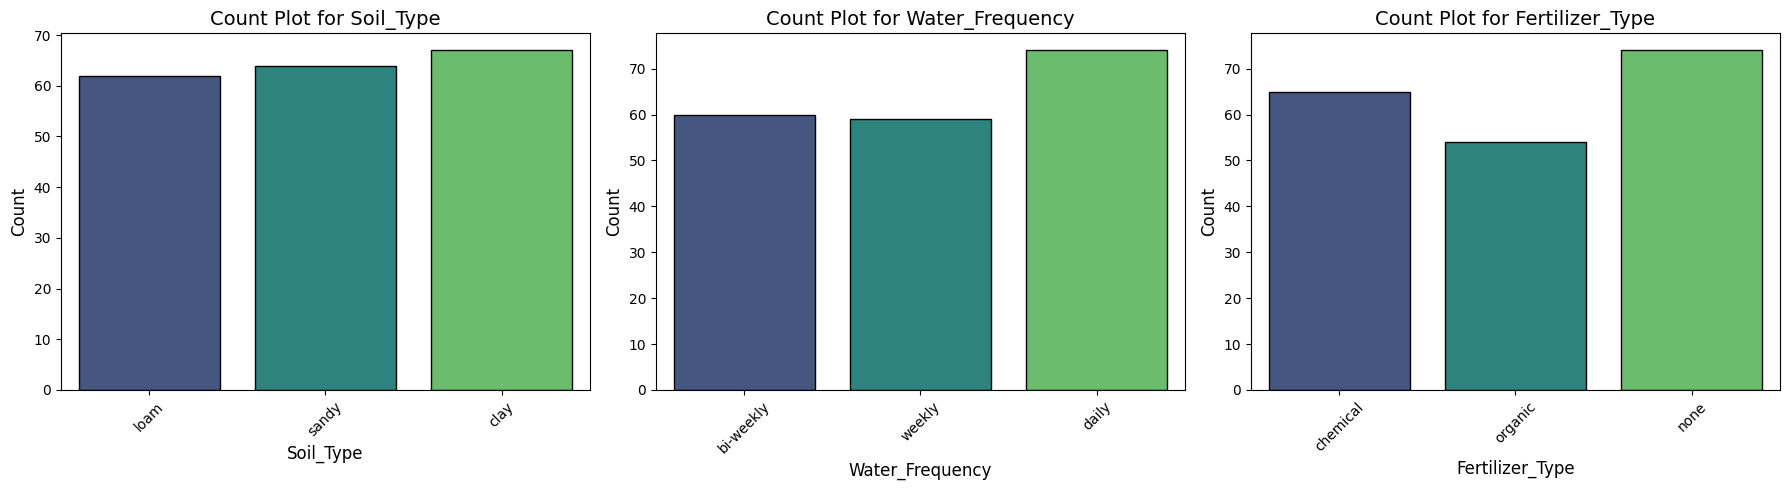

In [16]:
# Plotting each categorical column as a count plot

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

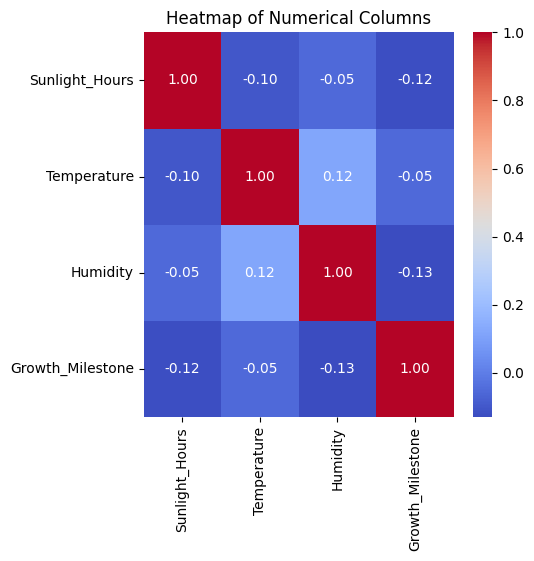

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [38]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [39]:
X = df.drop(columns=['Growth_Milestone'], axis=1)
y = df['Growth_Milestone']

In [40]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [41]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [43]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.4358974358974359, 0.4358974358974359, 0.46153846153846156, 0.5641025641025641, 0.5641025641025641, 0.48717948717948717, 0.5128205128205128, 0.5897435897435898, 0.41025641025641024]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.53      0.45        17
           1       0.50      0.36      0.42        22

    accuracy                           0.44        39
   macro avg       0.45      0.45      0.44        39
weighted avg       0.45      0.44      0.43        39

Confusion Matrix:
 [[ 9  8]
 [14  8]]


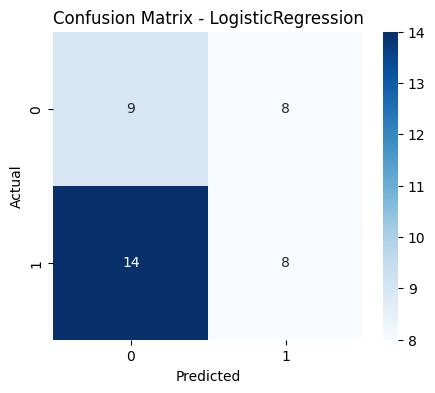

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.53      0.45        17
           1       0.50      0.36      0.42        22

    accuracy                           0.44        39
   macro avg       0.45      0.45      0.44        39
weighted avg       0.45      0.44      0.43        39

Confusion Matrix:
 [[ 9  8]
 [14  8]]


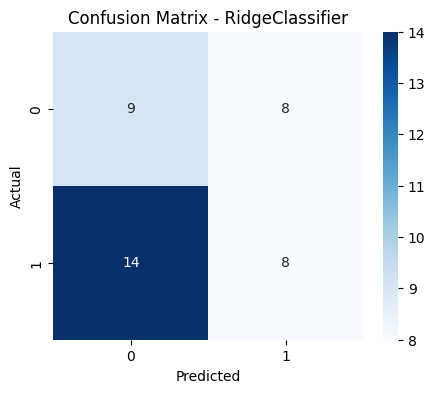

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.52      0.50      0.51        22

    accuracy                           0.46        39
   macro avg       0.46      0.46      0.46        39
weighted avg       0.46      0.46      0.46        39

Confusion Matrix:
 [[ 7 10]
 [11 11]]


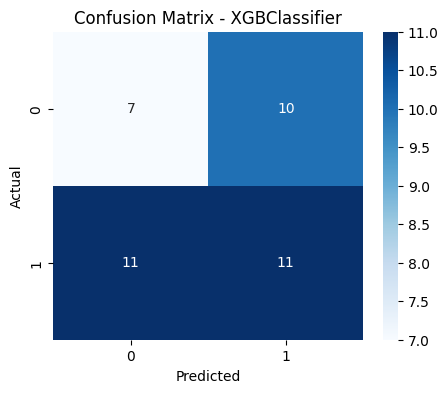

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.71      0.55      0.62        22

    accuracy                           0.62        39
   macro avg       0.63      0.63      0.62        39
weighted avg       0.64      0.62      0.62        39

Confusion Matrix:
 [[12  5]
 [10 12]]


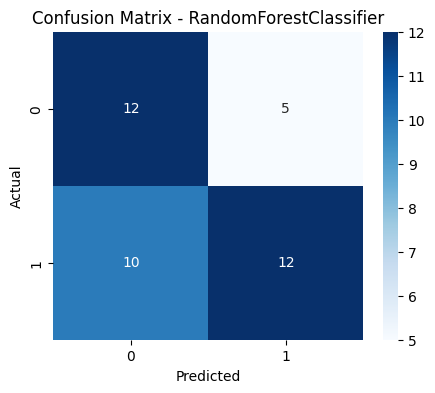

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.48        17
           1       0.61      0.64      0.62        22

    accuracy                           0.56        39
   macro avg       0.55      0.55      0.55        39
weighted avg       0.56      0.56      0.56        39

Confusion Matrix:
 [[ 8  9]
 [ 8 14]]


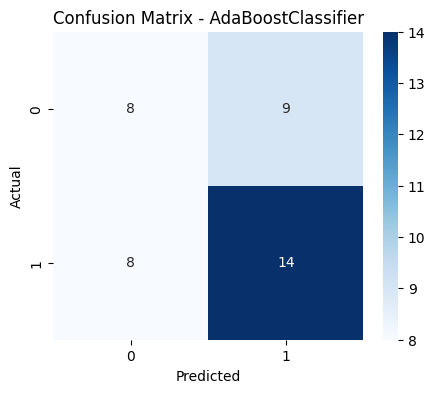

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.41      0.41        17
           1       0.55      0.55      0.55        22

    accuracy                           0.49        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.49      0.49      0.49        39

Confusion Matrix:
 [[ 7 10]
 [10 12]]


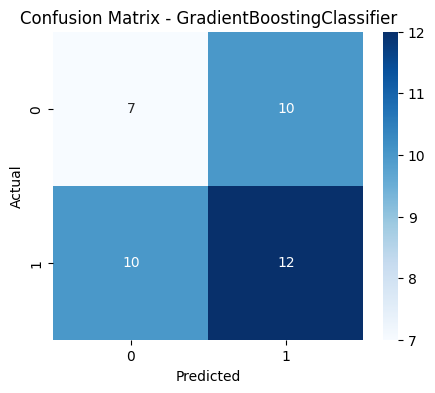

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.71      0.57        17
           1       0.64      0.41      0.50        22

    accuracy                           0.54        39
   macro avg       0.56      0.56      0.54        39
weighted avg       0.57      0.54      0.53        39

Confusion Matrix:
 [[12  5]
 [13  9]]


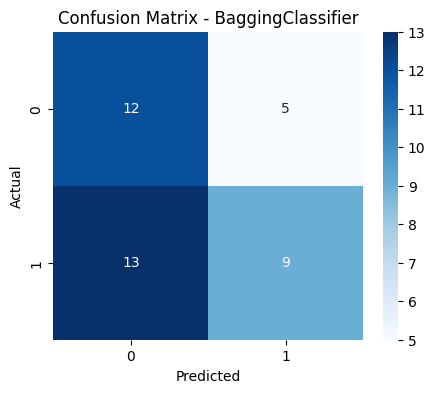

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.47      0.53        17
           1       0.65      0.77      0.71        22

    accuracy                           0.64        39
   macro avg       0.63      0.62      0.62        39
weighted avg       0.64      0.64      0.63        39

Confusion Matrix:
 [[ 8  9]
 [ 5 17]]


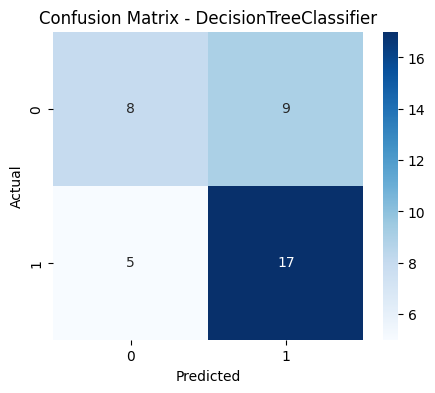

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.65      0.49        17
           1       0.45      0.23      0.30        22

    accuracy                           0.41        39
   macro avg       0.42      0.44      0.40        39
weighted avg       0.43      0.41      0.38        39

Confusion Matrix:
 [[11  6]
 [17  5]]


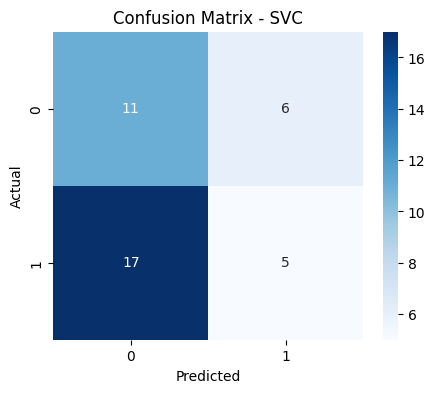

In [44]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()